Copyright **`(c)`** 2024 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

# Set Cover problem

See: https://en.wikipedia.org/wiki/Set_cover_problem

In [196]:
# Instance	Universe size	Num sets	Density
# 1	100	10	.2
# 2	1,000	100	.2
# 3	10,000	1,000	2
# 4	100,000	10,000	.1
# 5	100,000	10,000	
# 6	100,000	10,000	.3



In [197]:
from random import random, seed
from itertools import product
import numpy as np

from icecream import ic
from matplotlib import pyplot as plt
from itertools import accumulate


## Reproducible Initialization

If you want to get reproducible results, use `rng` (and restart the kernel); for non-reproducible ones, use `np.random`.

In [198]:
UNIVERSE_SIZE = 10000
NUM_SETS = 1000
DENSITY = 0.2 # 20% of the elements are in each set

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)])) #rng is the random number generator, so we can use it to generate random numbers

In [199]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY #generate the sets
for s in range(UNIVERSE_SIZE): #ensure that each element is in at least one set
    if not np.any(SETS[:, s]): #if the element is not in any set
        SETS[np.random.randint(NUM_SETS), s] = True #add it to a random set 
COSTS = np.power(SETS.sum(axis=1), 1.1) #compute the costs of each set #the costs? -> the number of elements in the set to the power of 1.1

## Helper Functions

In [200]:
def valid(solution):
    phenotype = np.logical_or.reduce(SETS[solution]) 
    return np.all(phenotype)

def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum() #return the sum of the costs of the sets in the solution 

## Have Fun!

In [201]:
def fitness(solution: np.ndarray): 
    return (valid(solution), -cost(solution)) 

In [202]:
# A dumb solution of "all" sets
solution = np.full(NUM_SETS, True) 
valid(solution), cost(solution) 


(True, 4273457.137346888)

In [203]:
# A random solution with random 50% of the sets
solution = rng.random(NUM_SETS) < .5 #generate a random solution. Each set is in the solution with 50% probability
print("solution:", solution)
valid(solution), cost(solution)



solution: [ True  True  True  True False False  True  True False  True  True  True
 False  True  True  True False False False False  True False False  True
  True  True  True  True False  True False  True False  True  True False
  True False False False  True False  True False False False  True False
 False  True  True False False  True  True False  True  True False False
 False False  True False  True False False False False  True False False
  True False False  True  True  True False  True  True False False  True
  True False  True  True  True False  True False  True  True  True False
 False False False  True  True False False False False  True  True False
 False False False  True False  True False  True  True False  True  True
 False False False False  True  True  True  True False  True  True  True
  True  True False  True  True  True False  True False False False  True
 False  True  True False  True  True  True  True False False False  True
  True False  True False  True  True  Tru

(True, 2136475.672200265)

In [204]:
# def greedy_set_cover(SETS, UNIVERSE_SIZE):
#     uncovered = np.ones(UNIVERSE_SIZE, dtype=bool)  
#     selected_sets = []  
    
#     while np.any(uncovered):
#         best_set_idx = None
#         best_coverage = 0
        
#         for i, set_i in enumerate(SETS): #enumerate? -> returns an enumerate object. It contains the index and value of all the items in the set as pairs. example: enumerate(sets) -> [(0, [True, True, False]), (1, [True, False, True]), (2, [False, True, True])]
#             coverage = np.sum(uncovered & set_i)  #!! Count how many uncovered elements this set can cover #example -> uncovered = [True, True, True], set_i = [True, True, False], uncovered & set_i = [True, True, False] -> np.sum([True, True, False]) = 2
#             if coverage > best_coverage: 
#                 best_coverage = coverage 
#                 best_set_idx = i #store the index of the set that covers the most uncovered elements
        
#         if best_set_idx is None: #if there is no set that covers any remaining elements 
#             # If no set can cover any remaining elements, it's impossible to cover the universe
#             raise ValueError("No valid set cover found!")
        
#         # Add the best set to the solution and update the uncovered elements
#         selected_sets.append(best_set_idx) #add the index of the best set to the selected sets
#         uncovered = uncovered & ~SETS[best_set_idx]  # Mark elements covered by this set as covered (False) #update the uncovered elements by removing the elements that are covered by the best set #example -> uncovered = [True, True, True], SETS[best_set_idx] = [True, True, False], ~SETS[best_set_idx] = [False, False, True], uncovered & ~SETS[best_set_idx] = [True, True, False]
#     print("\nselected sets:", SETS[selected_sets]) 
#     return selected_sets #return the indices of the selected sets. if we want to return the matrix with the selected sets we can use SETS[selected_sets]

# #we take the set that covers the most uncovered elements. 




In [205]:
# # Compute the solution using the greedy algorithm
# solution_indices = greedy_set_cover(SETS, UNIVERSE_SIZE)

# # Check if the solution is valid and compute its cost
# print("\nSelected sets - indexes:", solution_indices)
# print("\nSelected sets - len indexes:", len(solution_indices))
# is_valid = valid(solution_indices)
# solution_cost = cost(solution_indices)

# print(f"\nIs the solution valid? {is_valid}")
# print(f"Total cost of the solution: {solution_cost}")

# print(SETS)


In [206]:
def multiple_mutation_strength(solution: np.ndarray, strenght: float = 0.3) -> np.ndarray:
    mask = rng.random(NUM_SETS) < strenght #rng.random(NUM_SETS) genera dei numeri casuali tra 0 e 1, vettore di dimensione pari a num_sets. Se il numero è minore di strength, allora la cella corrispondente in mask è True
    #se aumento la strength, aumenta la probabilità che la cella in mask sia True e quindi che più mutazioni avvengano. si incoraggia di più l'esplorazione. (la miglior soluzione trovata sta sempre nel buffer in memoria)
    if not np.any(mask):
        mask[np.random.randint(NUM_SETS)] = True
    new_sol = np.logical_xor(solution, mask) #se la cella è True, la cambia in False e viceversa
    return new_sol #it's an array of booleans , dimension = num_sets


In [207]:
#instead of using a greedy algorithm and analyze each set in order starting from the first until the last, we want to check sets randomly. or for example starting from the smallest set.

def give_solution(SETS,UNIVERSE_SIZE):
    uncovered = np.ones(UNIVERSE_SIZE, dtype=bool)  
    selected_sets = [] 
    costs = []  # To track cost at each step
    
    # Calculate the sum of each set (how many elements each set can cover)
    set_sizes = np.sum(SETS, axis=1)

    # Sort indices of sets in ascending order based on their size (from smallest to largest set)
    sorted_indices = np.argsort(set_sizes) 

    # Now iterate over the sets in the sorted order
    for set_idx in sorted_indices: 
        if not np.any(uncovered):  # If no elements remain uncovered, break early
            break
        
        coverage = np.sum(uncovered & SETS[set_idx])  # Count how many uncovered elements this set can cover
        if coverage > 0:
            selected_sets.append(set_idx)  # Select this set
            uncovered = uncovered & ~SETS[set_idx]  # Update the uncovered elements
            solution[set_idx] = 1 
            # Track the cost after selecting this set
            current_cost = cost(selected_sets)  # Assuming you have a cost function
            costs.append(current_cost)  # Append current cost to the list of costs
    
    
    # Check if we have successfully covered all elements in the universe
    if np.any(uncovered):
        raise ValueError("No valid set cover found! Some elements remain uncovered.")
    
    #print("\nSelected sets:", SETS[selected_sets])  # Print the sets that have been selected
    return solution  #,costs  # Return both the indices of the selected sets and the costs

ic| fitness(solution): (True, -2230240.123289478)
ic| fitness(solution): (True, -132103.53889371903)


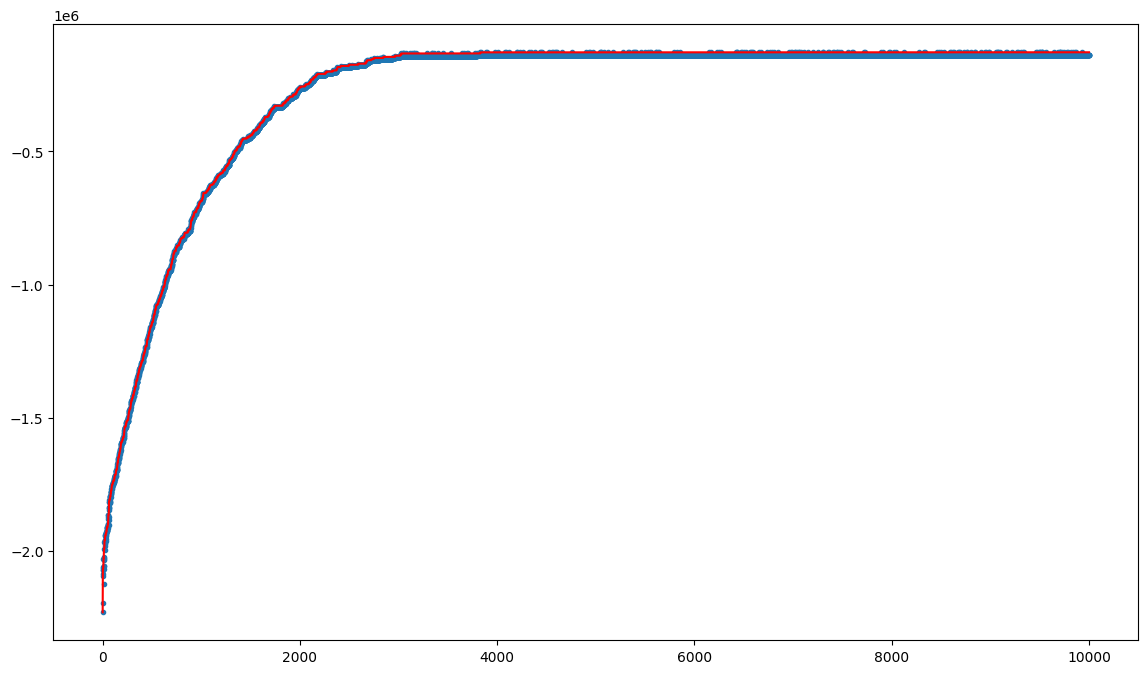

In [208]:
BUFFER_SIZE = 13

solution = give_solution(SETS,UNIVERSE_SIZE) 
#ic(solution)
solution_fitness = fitness(solution)
history = [float(solution_fitness[1])] #plot of the cost
ic(fitness(solution))

strength = 0.5
buffer = list()
for steps in range(10_000):
    # # SELF-ADAPTIVE PARAMETER
    # # The parameter adapt with the algorithm automatically.
    new_solution = multiple_mutation_strength(solution, strength)
    f = fitness(new_solution)
    history.append(float(f[1]))
    buffer.append(f > solution_fitness)
    buffer = buffer[-BUFFER_SIZE:] # keep only the last 13 elements. Create an array of 13 elements. There are both True and false. 
    
    if sum(buffer) > BUFFER_SIZE /2: #if more than half of the elements are True, increase the strength. sum(buffer) is the number of True elements.
        strength *= 1.2 # strength viene aumentato di un fattore del 20% (strength *= 1.2). In questo modo, si incoraggia l'esplorazione con variazioni maggiori.
    elif sum(buffer) < BUFFER_SIZE /2:
        strength /= 1.2
        
    if f > solution_fitness:
        solution = new_solution
        solution_fitness = fitness(solution)
        #ic(fitness(solution))
          
#ic(solution)
ic(fitness(solution))

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")
